# **Prova Prática de Introdução à Inteligência Artificial**
**Reuben Lisboa Ramalho Claudino - 20210024602**

## Import da Database e das Libs

In [244]:
# Import das bibliotecas e definição dos seus respectivos alias
# Pandas serve para trabalhar com a base de dados
# NumPy é utilizada para gerar as matrizes
# As outras 3 serão usadas para gerar gráficos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px



# Import da base de dados
base_akc = pd.read_csv('akc-data.csv')

In [245]:
# Exibindo base de dados original
base_akc.rename(columns={'Unnamed: 0': 'label'}, inplace=True)
pd.DataFrame(base_akc)

,label,description,temperament,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,...,grooming_frequency_value,grooming_frequency_category,shedding_value,shedding_category,energy_level_value,energy_level_category,trainability_value,trainability_category,demeanor_value,demeanor_category
0,Affenpinscher,The Affen’s apish look has been described many...,"Confident, Famously Funny, Fearless",148,22.86,29.21,3.175147,4.535924,12.0,15.0,...,0.6,2-3 Times a Week Brushing,0.6,Seasonal,0.6,Regular Exercise,0.8,Easy Training,1.0,Outgoing
1,Afghan Hound,"The Afghan Hound is an ancient breed, his whol...","Dignified, Profoundly Loyal, Aristocratic",113,63.50,68.58,22.679619,27.215542,12.0,15.0,...,0.8,Daily Brushing,0.2,Infrequent,0.8,Energetic,0.2,May be Stubborn,0.2,Aloof/Wary
2,Airedale Terrier,The Airedale Terrier is the largest of all ter...,"Friendly, Clever, Courageous",60,58.42,58.42,22.679619,31.751466,11.0,14.0,...,0.6,2-3 Times a Week Brushing,0.4,Occasional,0.6,Regular Exercise,1.0,Eager to Please,0.8,Friendly
3,Akita,"Akitas are burly, heavy-boned spitz-type dogs ...","Courageous, Dignified, Profoundly Loyal",47,60.96,71.12,31.751466,58.967008,10.0,13.0,...,0.8,Daily Brushing,0.6,Seasonal,0.8,Energetic,1.0,Eager to Please,0.6,Alert/Responsive
4,Alaskan Malamute,The Alaskan Malamute stands 23 to 25 inches at...,"Affectionate, Loyal, Playful",58,58.42,63.50,34.019428,38.555351,10.0,14.0,...,0.6,2-3 Times a Week Brushing,0.6,Seasonal,0.8,Energetic,0.4,Independent,0.8,Friendly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,Wirehaired Vizsla,WVs are close relatives of Vizslas but a disti...,"Gentle, Loyal, Trainable",167,54.61,63.50,20.411657,29.483504,12.0,14.0,...,0.2,Occasional Bath/Brush,0.6,Seasonal,0.8,Energetic,0.6,Agreeable,0.6,Alert/Responsive
273,Working Kelpie,The overall appearance of the Working Kelpie i...,"Alert, Eager, Intelligent",NaN,48.26,63.50,12.700586,27.215542,12.0,15.0,...,0.2,Occasional Bath/Brush,0.6,Seasonal,0.8,Energetic,0.4,Independent,0.6,Alert/Responsive
274,Xoloitzcuintli,The Xoloitzcuintli (show-low-eats-queen-tlee) ...,"Loyal, Alert, Calm",140,25.40,58.42,4.535924,24.947580,13.0,18.0,...,0.2,Occasional Bath/Brush,0.2,Infrequent,0.8,Energetic,0.6,Agreeable,0.6,Alert/Responsive
275,Yakutian Laika,For centuries the Yakutian Laika was an irrepl...,"Affectionate, Intelligent, Active",NaN,53.34,58.42,18.143695,24.947580,10.0,12.0,...,0.4,Weekly Brushing,0.6,Seasonal,0.8,Energetic,0.2,May be Stubborn,0.4,Reserved with Strangers


## Pré-processamento

### Limpeza de Dados

In [246]:
# Os atributos description, temperament e group foram removidos porque eram textuais. Utiliza-los tornaria o processamento e a execução desnecessariamente mais custosos
base_akc = base_akc.drop('description', axis = 1)
base_akc = base_akc.drop('temperament', axis = 1)
base_akc = base_akc.drop('group', axis = 1)


# Como mais de 25%(exatamente 28,519855596%) dos valores estão vazios, decidiu-se por cortar o atributo popularity
base_akc = base_akc.drop('popularity', axis = 1)

# Os atributos abaixo foram removidos pois foram indetificados como atributos categóricos derivados da classificação de atributos numéricos, portando são dados redundantes 
# Ex: grooming_frequency_value -> grooming_frequency_category
base_akc = base_akc.drop('grooming_frequency_category', axis = 1)
base_akc = base_akc.drop('shedding_category', axis = 1)
base_akc = base_akc.drop('energy_level_category', axis = 1)
base_akc = base_akc.drop('trainability_category', axis = 1)
base_akc = base_akc.drop('demeanor_category', axis = 1)

### Lidando com Dados Incompletos

- Definiu-se o limite superior em que os atributos serão preechidos manualmente como sendo 10 valores incompletos.

- Dados que serão preenchidos manualmente utilizarão informações de www.akc.org para tal.

- Para atributos com valores faltosos superior a 10 será utilizada a média da população.






In [247]:
# Verificação de valores nulos
base_akc.isnull().sum()

label                        0
min_height                   0
max_height                   0
min_weight                   2
max_weight                   2
min_expectancy               3
max_expectancy               3
grooming_frequency_value     7
shedding_value              20
energy_level_value           6
trainability_value          24
demeanor_value              25
dtype: int64

In [248]:
# Verificação de valores 0s
valores_zero = base_akc == 0.0
valores_zero.sum()

label                       0
min_height                  0
max_height                  0
min_weight                  1
max_weight                  1
min_expectancy              1
max_expectancy              1
grooming_frequency_value    0
shedding_value              0
energy_level_value          0
trainability_value          0
demeanor_value              0
dtype: int64

 #### Preenchendo Min_weight e Max_weight

In [249]:
# Exibindo as linhas em que ambos os valores de 'min_weight' e 'max_weight' são nulos
base_akc[base_akc[['min_weight','max_weight']].isnull().all(axis= 1)]

,label,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
16,Australian Kelpie,43.18,50.80,NaN,NaN,10.0,13.0,0.4,0.8,0.8,1.0,0.6
244,Spinone Italiano,55.88,68.58,NaN,NaN,10.0,12.0,0.4,NaN,0.8,0.6,0.6


In [250]:
# Exibindo as linhas em que ambos os valores de 'min_weight' e 'max_weight' são zero
base_akc[(base_akc['min_weight'] == 0.0) & (base_akc['max_weight'] == 0.0)]

,label,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
65,Cane Corso,59.69,69.85,0.0,0.0,9.0,12.0,0.2,0.4,0.8,0.6,0.6


In [251]:
# Preenchendo valores nulos
# obs1: Foi necessário fazer conversão de Libra(site) para Quilograma(database)
# obs2: Dados sobre peso de Spinone Italiano ausentes no site, foi utilizada outra fonte(www.borrowmydoggy.com/doggypedia/dog-breed-guides-italian-spinone)
# obs3: Dados sobre peso de Cane Corso ausentes no site, foi utilizada outra fonte(pt.wikipedia.org/wiki/Cane_corso)
base_akc.at[16, 'min_weight'] = 15.8757
base_akc.at[16, 'max_weight'] = 22.6796
base_akc.at[244, 'min_weight'] = 29.0
base_akc.at[244, 'max_weight'] = 39.0
base_akc.at[65, 'min_weight'] = 40.0
base_akc.at[65, 'max_weight'] = 50.0

---

 #### Preenchendo Min_expectancy e Max_expectancy

In [252]:
# Exibindo as linhas em que ambos os valores de 'min_expectancy' e 'max_expectancy' são nulos
base_akc[base_akc[['min_expectancy','max_expectancy']].isnull().all(axis= 1)]

,label,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
55,Braque Francais Pyrenean,46.990,58.42,18.143695,24.947580,NaN,NaN,0.2,0.6,1.0,NaN,NaN
67,Carolina Dog,45.085,49.53,13.607771,24.947580,NaN,NaN,0.2,0.6,0.6,1.0,0.6
71,Central Asian Shepherd Dog,64.770,69.85,39.916129,49.895161,NaN,NaN,0.2,0.6,0.4,0.4,0.2


In [253]:
# Exibindo as linhas em que ambos os valores de 'min_expectancy' e 'max_expectancy' são zero
base_akc[(base_akc['min_expectancy'] == 0.0) & (base_akc['max_expectancy'] == 0.0)]

,label,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
209,Pyrenean Shepherd,38.1,53.34,6.803886,13.607771,0.0,0.0,0.4,0.6,0.8,0.6,0.4


In [254]:
# Preenchendo valores nulos
# obs: Dados sobre expectativa de vida do Central Asian Shepherd Dog ausentes no site, foi utilizada outra fonte(en.wikipedia.org/wiki/Central_Asian_Shepherd_Dog)
base_akc.at[55, 'min_expectancy'] = 12.0
base_akc.at[55, 'max_expectancy'] = 15.0
base_akc.at[67, 'min_expectancy'] = 12.0
base_akc.at[67, 'max_expectancy'] = 15.0
base_akc.at[71, 'min_expectancy'] = 12.0
base_akc.at[71, 'max_expectancy'] = 15.0
base_akc.at[209, 'min_expectancy'] = 17.0
base_akc.at[209, 'max_expectancy'] = 19.0

---

#### Preenchendo Grooming_frequency_value

In [255]:
# Exibindo as linhas em que valores de 'grooming_frequency_value' são nulos
base_akc[base_akc['grooming_frequency_value'].isnull()]

,label,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
9,American Hairless Terrier,30.48,40.64,5.443108,7.257478,14.0,16.0,NaN,NaN,NaN,NaN,NaN
68,Catahoula Leopard Dog,55.88,60.96,22.679619,43.091275,10.0,14.0,NaN,NaN,1.0,0.4,0.4
111,French Spaniel,54.61,60.96,22.679619,27.215542,10.0,12.0,NaN,NaN,NaN,NaN,NaN
141,Jagdterrier,33.02,40.64,7.711070,9.979032,10.0,12.0,NaN,NaN,NaN,NaN,NaN
195,Poodle (Miniature),25.40,38.10,4.535924,6.803886,10.0,18.0,NaN,NaN,NaN,NaN,NaN
242,Spanish Mastiff,71.12,88.90,63.502932,90.718474,10.0,12.0,NaN,0.6,0.4,NaN,NaN
257,Tornjak,58.42,71.12,28.122727,49.895161,12.0,14.0,NaN,NaN,NaN,0.8,0.6


In [256]:
# Preenchendo valores nulos
base_akc.at[9, 'grooming_frequency_value'] = 0.2
base_akc.at[68, 'grooming_frequency_value'] = 0.4 
base_akc.at[111, 'grooming_frequency_value'] = 0.2
base_akc.at[141, 'grooming_frequency_value'] = 0.2
base_akc.at[195, 'grooming_frequency_value'] = 0.8
base_akc.at[242, 'grooming_frequency_value'] = 0.2
base_akc.at[257, 'grooming_frequency_value'] = 0.4

---

#### Preenchendo Energy_level_value

In [257]:
# Exibindo as linhas em que valores de 'energy_level_value' são nulos
base_akc[base_akc['energy_level_value'].isnull()]

,label,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
9,American Hairless Terrier,30.48,40.64,5.443108,7.257478,14.0,16.0,0.2,NaN,NaN,NaN,NaN
111,French Spaniel,54.61,60.96,22.679619,27.215542,10.0,12.0,0.2,NaN,NaN,NaN,NaN
141,Jagdterrier,33.02,40.64,7.711070,9.979032,10.0,12.0,0.2,NaN,NaN,NaN,NaN
195,Poodle (Miniature),25.40,38.10,4.535924,6.803886,10.0,18.0,0.8,NaN,NaN,NaN,NaN
227,Segugio Italiano,48.26,58.42,18.143695,27.215542,11.0,13.0,0.4,0.6,NaN,1.0,NaN
257,Tornjak,58.42,71.12,28.122727,49.895161,12.0,14.0,0.4,NaN,NaN,0.8,0.6


In [258]:
# Preenchendo valores nulos
base_akc.at[9, 'energy_level_value'] = 0.6
base_akc.at[111, 'energy_level_value'] = 0.8
base_akc.at[141, 'energy_level_value'] = 0.6
base_akc.at[195, 'energy_level_value'] = 0.8
base_akc.at[227, 'energy_level_value'] = 0.6
base_akc.at[257, 'energy_level_value'] = 0.6

---

#### Preenchendo Atributos Restantes

In [259]:
# Calcular as médias
shedding_mean = base_akc['shedding_value'].mean()
trainability_mean = base_akc['trainability_value'].mean()
demeanor_mean = base_akc['demeanor_value'].mean()

# Preencher os valores nulos com as médias calculadas em todo o DataFrame
base_akc.fillna({'shedding_value': shedding_mean, 'trainability_value': trainability_mean, 'demeanor_value': demeanor_mean}, inplace=True)


---

### Separando Atributos e Rótulos

In [260]:
# Divisão do Dataframe em dois: Um contendo os atributos e o outro contendo apenas os rótulos

# Atributos
X_ack = base_akc.drop('label', axis= 1)

# Rótulos
Y_ack = base_akc.iloc[:, :1]


### Verificação de Correlações 

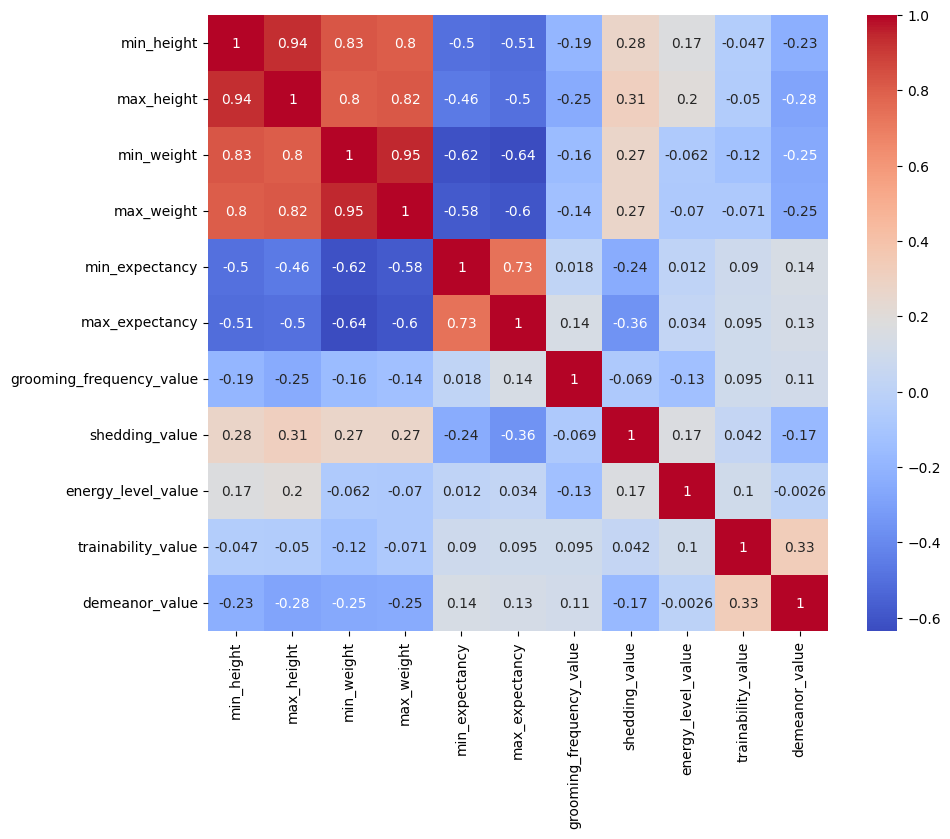

In [261]:
# Verificando a correlação entre os atributos
correlation_matrix = X_ack.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

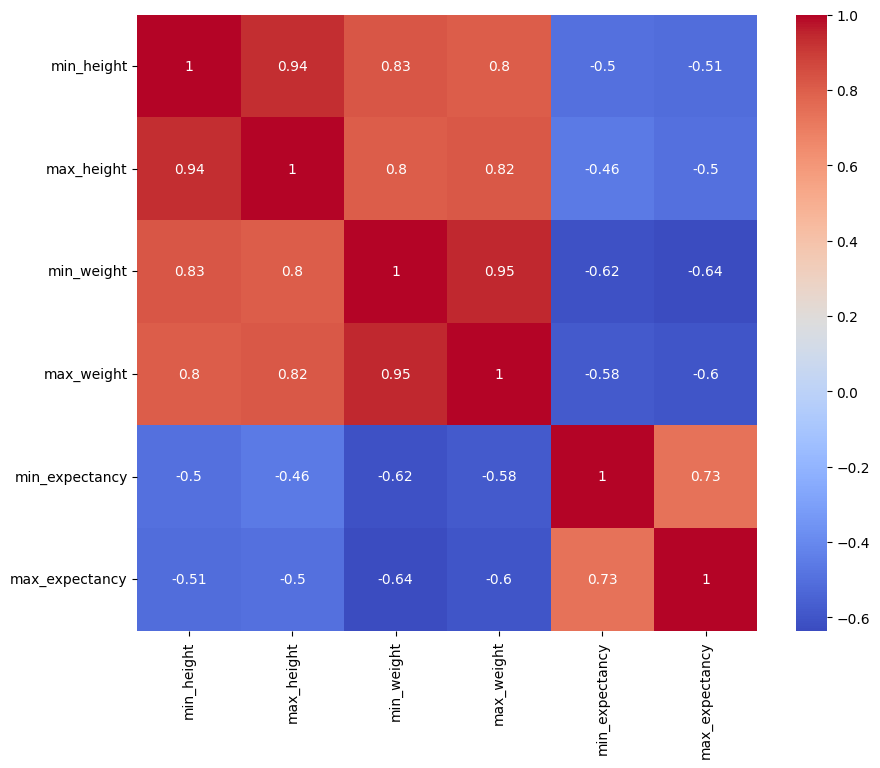

In [262]:
# Zoom in nos atributos que apresentam maior correlação
correlation_matrix = pd.DataFrame(X_ack.drop(['grooming_frequency_value', 'shedding_value', 'energy_level_value', 'trainability_value', 'demeanor_value'], axis= 1)).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### Agregação Manual

In [263]:
# Cópia dos atributos antes da agregação para usar no PCA
preagr_X_ack = X_ack.copy()

In [264]:
# Agregação manual dos atributos min_height & max_height, min_weight & max_weight e min_expectancy & max_expectancy devida à alta correlação entre eles (veja no heat map acima)
# Obs: Essa alta correlação se deve ao fato desse atributos serem mínimos e máximos de uma mesma característica da população
X_ack.iloc[:, 0] = (X_ack.iloc[:, 0] + X_ack.iloc[:, 1]) / 2
X_ack.iloc[:, 2] = (X_ack.iloc[:, 2] + X_ack.iloc[:, 3]) / 2
X_ack.iloc[:, 4] = (X_ack.iloc[:, 4] + X_ack.iloc[:, 5]) / 2

# Drop de colunas que não seram mais usadas
X_ack = X_ack.drop(['max_height', 'max_weight', 'max_expectancy' ], axis = 1)

# Corrigindo o label das colunas
X_ack.rename(columns={'min_height': 'medium_height'}, inplace=True)
X_ack.rename(columns={'min_weight': 'medium_weight'}, inplace=True)
X_ack.rename(columns={'min_expectancy': 'medium_expectancy'}, inplace=True)

# Ajustando a precisão dos atributos medium_height e medium_weight para duas casas decimais, com o objetivo de tornar a base de dados mais concisa e legível.
X_ack[['medium_height', 'medium_weight']] = X_ack[['medium_height', 'medium_weight']].astype(float).apply(lambda x: round(x, 2))


### PCA

In [265]:
# Libs necessárias para o PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [266]:
# Normalizando os dados
scaler = StandardScaler()
X_ack_scaled = scaler.fit_transform(X_ack)

In [267]:
# Especificando o número de componentes desejados
n_components = 8

# Inicializando e ajustando o modelo PCA aos dados normalizados
pca = PCA(n_components = n_components)
pca.fit(X_ack_scaled)

# Transformando os dados para o espaço de componentes principais
X_pca = pca.transform(X_ack_scaled)